In [1]:
import pandas as pd

# Finding Delaware codes

In [2]:
state = pd.read_csv('Data/for_exploration/GeoIDs - State.csv')

In [3]:
state.head()

,statefips,statename,stateabbrev,state_pop2019
0,1,Alabama,AL,4903185
1,2,Alaska,AK,731545
2,4,Arizona,AZ,7278717
3,5,Arkansas,AR,3017804
4,6,California,CA,39512223


In [4]:
de = state[state['statename'] == 'Delaware']
de

,statefips,statename,stateabbrev,state_pop2019
7,10,Delaware,DE,973764


In [5]:
county = pd.read_csv('Data/for_exploration/GeoIDs - County.csv')
county.head()

,countyfips,countyname,cz,czname,statename,statefips,stateabbrev,county_pop2019
0,1001,Autauga,11101.0,Montgomery,Alabama,1,AL,55869
1,1003,Baldwin,11001.0,Mobile,Alabama,1,AL,223234
2,1005,Barbour,10301.0,Eufaula,Alabama,1,AL,24686
3,1007,Bibb,10801.0,Tuscaloosa,Alabama,1,AL,22394
4,1009,Blount,10700.0,Birmingham,Alabama,1,AL,57826


In [6]:
de_county = county[county['statename'] == 'Delaware']
de_county

,countyfips,countyname,cz,czname,statename,statefips,stateabbrev,county_pop2019
316,10001,Kent,19901.0,Dover,Delaware,10,DE,180786
317,10003,New Castle,19800.0,Wilmington,Delaware,10,DE,558753
318,10005,Sussex,19901.0,Dover,Delaware,10,DE,234225


## Function to convert the year, month, day columns into a date column with a datetime

In [7]:
def convert_time(dataframe):
    dataframe.replace({'month': {1: '01', 2: '02', 3: '03', 4: '04', 5: '05', 6:'06', 7:'07', 8:'08', 9:'09'},
                        'day': {1: '01', 2: '02', 3: '03', 4: '04', 5: '05', 6:'06', 7:'07', 8:'08', 9:'09'}}, inplace=True)
    dataframe['date'] = dataframe['year'].apply(str) + dataframe['month'].apply(str) + dataframe['day'].apply(str)
    dataframe['date'] = pd.to_datetime(dataframe['date'], format='%Y%m%d')
    dataframe.drop(columns=['year', 'month', 'day'], inplace = True)
    return dataframe
    

# Filtering Delaware Data

In [8]:
cases_state = pd.read_csv('Data/for_exploration/COVID - State - Daily.csv')
cases_state.head()

,year,month,day,statefips,case_count,death_count,test_count,case_rate,death_rate,test_rate,new_case_rate,new_death_rate,new_test_rate,new_case_count,new_death_count,new_test_count
0,2020,1,21,1,0,0,.,0.0,0.0,.,.,.,.,.,.,.
1,2020,1,21,2,0,0,.,0.0,0.0,.,.,.,.,.,.,.
2,2020,1,21,4,0,0,.,0.0,0.0,.,.,.,.,.,.,.
3,2020,1,21,5,0,0,.,0.0,0.0,.,.,.,.,.,.,.
4,2020,1,21,6,0,0,.,0.0,0.0,.,.,.,.,.,.,.


In [9]:
cases_state = convert_time(cases_state)
cases_state.head()

,statefips,case_count,death_count,test_count,case_rate,death_rate,test_rate,new_case_rate,new_death_rate,new_test_rate,new_case_count,new_death_count,new_test_count,date
0,1,0,0,.,0.0,0.0,.,.,.,.,.,.,.,2020-01-21
1,2,0,0,.,0.0,0.0,.,.,.,.,.,.,.,2020-01-21
2,4,0,0,.,0.0,0.0,.,.,.,.,.,.,.,2020-01-21
3,5,0,0,.,0.0,0.0,.,.,.,.,.,.,.,2020-01-21
4,6,0,0,.,0.0,0.0,.,.,.,.,.,.,.,2020-01-21


In [10]:
de_cases = cases_state[cases_state['statefips']==10]
de_cases.head(20)

,statefips,case_count,death_count,test_count,case_rate,death_rate,test_rate,new_case_rate,new_death_rate,new_test_rate,new_case_count,new_death_count,new_test_count,date
7,10,0,0,.,0.0,0.0,.,.,.,.,.,.,.,2020-01-21
58,10,0,0,.,0.0,0.0,.,.,.,.,.,.,.,2020-01-22
109,10,0,0,.,0.0,0.0,.,.,.,.,.,.,.,2020-01-23
160,10,0,0,.,0.0,0.0,.,.,.,.,.,.,.,2020-01-24
211,10,0,0,.,0.0,0.0,.,.,.,.,.,.,.,2020-01-25
262,10,0,0,.,0.0,0.0,.,.,.,.,.,.,.,2020-01-26
313,10,0,0,.,0.0,0.0,.,0,0,.,0,0,.,2020-01-27
364,10,0,0,.,0.0,0.0,.,0,0,.,0,0,.,2020-01-28
415,10,0,0,.,0.0,0.0,.,0,0,.,0,0,.,2020-01-29
466,10,0,0,.,0.0,0.0,.,0,0,.,0,0,.,2020-01-30


In [11]:
cases_county = pd.read_csv('Data/for_exploration/COVID - County - Daily.csv', low_memory=False)
cases_county.head()

,year,month,day,countyfips,case_count,death_count,case_rate,death_rate,new_case_rate,new_death_rate,new_case_count,new_death_count
0,2020,1,21,1001,0,0,0,0,.,.,.,.
1,2020,1,21,1003,0,0,0,0,.,.,.,.
2,2020,1,21,1005,0,0,0,0,.,.,.,.
3,2020,1,21,1007,0,0,0,0,.,.,.,.
4,2020,1,21,1009,0,0,0,0,.,.,.,.


In [12]:
cases_county = convert_time(cases_county)
cases_county.head()

,countyfips,case_count,death_count,case_rate,death_rate,new_case_rate,new_death_rate,new_case_count,new_death_count,date
0,1001,0,0,0,0,.,.,.,.,2020-01-21
1,1003,0,0,0,0,.,.,.,.,2020-01-21
2,1005,0,0,0,0,.,.,.,.,2020-01-21
3,1007,0,0,0,0,.,.,.,.,2020-01-21
4,1009,0,0,0,0,.,.,.,.,2020-01-21


In [13]:
de_county_cases = cases_county[(cases_county['countyfips']  == 10001) | (cases_county['countyfips'] == 10003) | (cases_county['countyfips'] == 10005)]
de_county_cases.head()

,countyfips,case_count,death_count,case_rate,death_rate,new_case_rate,new_death_rate,new_case_count,new_death_count,date
316,10001,0,0,0,0,.,.,.,.,2020-01-21
317,10003,0,0,0,0,.,.,.,.,2020-01-21
318,10005,0,0,0,0,.,.,.,.,2020-01-21
3458,10001,0,0,0,0,.,.,.,.,2020-01-22
3459,10003,0,0,0,0,.,.,.,.,2020-01-22


In [14]:
bus = pd.read_csv('Data/Womply_Merchants_State_Daily.csv')
bus.head()

,year,month,day,statefips,merchants_all,merchants_inchigh,merchants_inclow,merchants_incmiddle,merchants_ss40,merchants_ss60,merchants_ss65,merchants_ss70
0,2020,1,10,1,0.003740,0.010400,0.00676,-0.00139,0.00833,.021,-.0121,0.004170
1,2020,1,10,2,0.005870,-0.004040,0.06740,0.01140,0.03470,-.0473,-.0383,0.013100
2,2020,1,10,4,0.004780,0.013600,0.00211,0.00333,0.01720,.00266,.00805,0.001590
3,2020,1,10,5,-0.001860,-0.001460,-0.00463,0.00326,0.00162,-.0182,.0223,-0.018700
4,2020,1,10,6,0.000312,-0.000719,-0.00902,0.00426,0.00331,.00445,-.00253,0.000524


In [15]:
bus = convert_time(bus)
bus.head()

,statefips,merchants_all,merchants_inchigh,merchants_inclow,merchants_incmiddle,merchants_ss40,merchants_ss60,merchants_ss65,merchants_ss70,date
0,1,0.003740,0.010400,0.00676,-0.00139,0.00833,.021,-.0121,0.004170,2020-01-10
1,2,0.005870,-0.004040,0.06740,0.01140,0.03470,-.0473,-.0383,0.013100,2020-01-10
2,4,0.004780,0.013600,0.00211,0.00333,0.01720,.00266,.00805,0.001590,2020-01-10
3,5,-0.001860,-0.001460,-0.00463,0.00326,0.00162,-.0182,.0223,-0.018700,2020-01-10
4,6,0.000312,-0.000719,-0.00902,0.00426,0.00331,.00445,-.00253,0.000524,2020-01-10


In [16]:
bus['loc_date'] = bus['statefips'].astype(str) + " " + bus['date'].astype(str)
bus.head()

,statefips,merchants_all,merchants_inchigh,merchants_inclow,merchants_incmiddle,merchants_ss40,merchants_ss60,merchants_ss65,merchants_ss70,date,loc_date
0,1,0.003740,0.010400,0.00676,-0.00139,0.00833,.021,-.0121,0.004170,2020-01-10,1 2020-01-10
1,2,0.005870,-0.004040,0.06740,0.01140,0.03470,-.0473,-.0383,0.013100,2020-01-10,2 2020-01-10
2,4,0.004780,0.013600,0.00211,0.00333,0.01720,.00266,.00805,0.001590,2020-01-10,4 2020-01-10
3,5,-0.001860,-0.001460,-0.00463,0.00326,0.00162,-.0182,.0223,-0.018700,2020-01-10,5 2020-01-10
4,6,0.000312,-0.000719,-0.00902,0.00426,0.00331,.00445,-.00253,0.000524,2020-01-10,6 2020-01-10


In [17]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17085 entries, 0 to 17084
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   statefips            17085 non-null  int64         
 1   merchants_all        17085 non-null  float64       
 2   merchants_inchigh    17085 non-null  float64       
 3   merchants_inclow     17085 non-null  float64       
 4   merchants_incmiddle  17085 non-null  float64       
 5   merchants_ss40       17085 non-null  float64       
 6   merchants_ss60       17085 non-null  object        
 7   merchants_ss65       17085 non-null  object        
 8   merchants_ss70       17085 non-null  float64       
 9   date                 17085 non-null  datetime64[ns]
 10  loc_date             17085 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 1.4+ MB


In [18]:
de_bus = bus[bus['statefips']==10]
de_bus.head(10)

,statefips,merchants_all,merchants_inchigh,merchants_inclow,merchants_incmiddle,merchants_ss40,merchants_ss60,merchants_ss65,merchants_ss70,date,loc_date
7,10,-0.006240,-0.00889,0.040100,-0.01000,-0.003320,-.0419,-.00869,0.009600,2020-01-10,10 2020-01-10
58,10,-0.000398,-0.00202,0.027200,-0.00265,0.004390,-.0468,-.00212,0.011500,2020-01-11,10 2020-01-11
109,10,-0.003980,0.00353,0.002060,-0.00605,0.000766,-.0279,.00386,0.004690,2020-01-12,10 2020-01-12
160,10,0.006780,0.00068,0.013400,0.00749,0.008170,.00373,-.00173,0.015400,2020-01-13,10 2020-01-13
211,10,0.010900,-0.00450,0.015000,0.01370,0.014400,-.0264,.00367,0.003780,2020-01-14,10 2020-01-14
262,10,0.019000,-0.00535,0.028200,0.02330,0.020400,-.00427,.00212,0.008200,2020-01-15,10 2020-01-15
313,10,0.011500,0.00953,0.000001,0.01330,0.016600,-.021,-.00448,0.010500,2020-01-16,10 2020-01-16
364,10,0.010900,0.01950,-0.015300,0.01210,0.017400,-.0328,.00776,0.001360,2020-01-17,10 2020-01-17
415,10,0.014100,0.02810,0.004670,0.01220,0.022100,-.0221,.00976,0.002090,2020-01-18,10 2020-01-18
466,10,0.014000,0.03760,0.005760,0.00982,0.023100,-.0365,.00577,0.000712,2020-01-19,10 2020-01-19


In [19]:
bus_county = pd.read_csv('Data/Womply_Merchants_County_Daily.csv')
bus_county.head()

,year,month,day,countyfips,merchants_all
0,2020,1,10,1003,0.02350
1,2020,1,10,1015,-0.02000
2,2020,1,10,1021,0.00726
3,2020,1,10,1031,0.03000
4,2020,1,10,1033,-0.02800


In [20]:
bus_county = convert_time(bus_county)
bus_county.head()

,countyfips,merchants_all,date
0,1003,0.02350,2020-01-10
1,1015,-0.02000,2020-01-10
2,1021,0.00726,2020-01-10
3,1031,0.03000,2020-01-10
4,1033,-0.02800,2020-01-10


In [21]:
bus_county['loc_date'] = bus_county['countyfips'].astype(str) + " " + bus_county['date'].astype(str)
bus_county.head()

,countyfips,merchants_all,date,loc_date
0,1003,0.02350,2020-01-10,1003 2020-01-10
1,1015,-0.02000,2020-01-10,1015 2020-01-10
2,1021,0.00726,2020-01-10,1021 2020-01-10
3,1031,0.03000,2020-01-10,1031 2020-01-10
4,1033,-0.02800,2020-01-10,1033 2020-01-10


In [22]:
bus_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393951 entries, 0 to 393950
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   countyfips     393951 non-null  int64         
 1   merchants_all  393951 non-null  float64       
 2   date           393951 non-null  datetime64[ns]
 3   loc_date       393951 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 12.0+ MB


In [23]:
bus_K_de = bus_county[bus_county['countyfips']  == 10001]
bus_K_de.head()

,countyfips,merchants_all,date,loc_date
140,10001,0.00457,2020-01-10,10001 2020-01-10
1316,10001,0.02330,2020-01-11,10001 2020-01-11
2492,10001,0.02520,2020-01-12,10001 2020-01-12
3668,10001,0.03300,2020-01-13,10001 2020-01-13
4844,10001,0.03580,2020-01-14,10001 2020-01-14


In [24]:
bus_NC_de = bus_county[bus_county['countyfips']  == 10003]
bus_NC_de.head()

,countyfips,merchants_all,date,loc_date
141,10003,-0.00267,2020-01-10,10003 2020-01-10
1317,10003,-0.00415,2020-01-11,10003 2020-01-11
2493,10003,-0.00611,2020-01-12,10003 2020-01-12
3669,10003,-0.00247,2020-01-13,10003 2020-01-13
4845,10003,-0.00331,2020-01-14,10003 2020-01-14


In [25]:
bus_S_de = bus_county[bus_county['countyfips']  == 10005]
bus_S_de.head()

,countyfips,merchants_all,date,loc_date
142,10005,-0.02110,2020-01-10,10005 2020-01-10
1318,10005,-0.01170,2020-01-11,10005 2020-01-11
2494,10005,-0.01600,2020-01-12,10005 2020-01-12
3670,10005,0.00958,2020-01-13,10005 2020-01-13
4846,10005,0.02560,2020-01-14,10005 2020-01-14


In [26]:
bus_rev = pd.read_csv('Data/Womply_Revenue_State_Daily.csv')
bus_rev.head()

,year,month,day,statefips,revenue_all,revenue_inchigh,revenue_inclow,revenue_incmiddle,revenue_ss40,revenue_ss60,revenue_ss65,revenue_ss70
0,2020,1,10,1,-0.01240,0.02050,-0.022700,-0.01040,-0.00885,-.0023,-.0128,0.011100
1,2020,1,10,2,0.01570,-0.00647,0.000054,0.03910,0.04260,-.0463,-.129,0.024200
2,2020,1,10,4,-0.02460,-0.00443,-0.036300,-0.02570,-0.02090,-.0196,-.0201,0.000327
3,2020,1,10,5,-0.03480,-0.08340,-0.056300,0.00832,-0.01540,-.0567,-.0361,-0.047100
4,2020,1,10,6,-0.00569,-0.00953,-0.029100,0.00533,-0.00850,.00434,-.00308,-0.014000


In [27]:
bus_rev = convert_time(bus_rev)
bus_rev.head()

,statefips,revenue_all,revenue_inchigh,revenue_inclow,revenue_incmiddle,revenue_ss40,revenue_ss60,revenue_ss65,revenue_ss70,date
0,1,-0.01240,0.02050,-0.022700,-0.01040,-0.00885,-.0023,-.0128,0.011100,2020-01-10
1,2,0.01570,-0.00647,0.000054,0.03910,0.04260,-.0463,-.129,0.024200,2020-01-10
2,4,-0.02460,-0.00443,-0.036300,-0.02570,-0.02090,-.0196,-.0201,0.000327,2020-01-10
3,5,-0.03480,-0.08340,-0.056300,0.00832,-0.01540,-.0567,-.0361,-0.047100,2020-01-10
4,6,-0.00569,-0.00953,-0.029100,0.00533,-0.00850,.00434,-.00308,-0.014000,2020-01-10


In [28]:
bus_rev['loc_date'] = bus_rev['statefips'].astype(str) + " " + bus_rev['date'].astype(str)
bus_rev.head()

,statefips,revenue_all,revenue_inchigh,revenue_inclow,revenue_incmiddle,revenue_ss40,revenue_ss60,revenue_ss65,revenue_ss70,date,loc_date
0,1,-0.01240,0.02050,-0.022700,-0.01040,-0.00885,-.0023,-.0128,0.011100,2020-01-10,1 2020-01-10
1,2,0.01570,-0.00647,0.000054,0.03910,0.04260,-.0463,-.129,0.024200,2020-01-10,2 2020-01-10
2,4,-0.02460,-0.00443,-0.036300,-0.02570,-0.02090,-.0196,-.0201,0.000327,2020-01-10,4 2020-01-10
3,5,-0.03480,-0.08340,-0.056300,0.00832,-0.01540,-.0567,-.0361,-0.047100,2020-01-10,5 2020-01-10
4,6,-0.00569,-0.00953,-0.029100,0.00533,-0.00850,.00434,-.00308,-0.014000,2020-01-10,6 2020-01-10


In [29]:
bus_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17085 entries, 0 to 17084
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   statefips          17085 non-null  int64         
 1   revenue_all        17085 non-null  float64       
 2   revenue_inchigh    17085 non-null  float64       
 3   revenue_inclow     17085 non-null  float64       
 4   revenue_incmiddle  17085 non-null  float64       
 5   revenue_ss40       17085 non-null  float64       
 6   revenue_ss60       17085 non-null  object        
 7   revenue_ss65       17085 non-null  object        
 8   revenue_ss70       17085 non-null  float64       
 9   date               17085 non-null  datetime64[ns]
 10  loc_date           17085 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 1.4+ MB


In [30]:
de_bus_rev = bus_rev[bus_rev['statefips']==10]
de_bus_rev.head(10)

,statefips,revenue_all,revenue_inchigh,revenue_inclow,revenue_incmiddle,revenue_ss40,revenue_ss60,revenue_ss65,revenue_ss70,date,loc_date
7,10,-0.0709,-0.01700,0.15100,-0.1060,-0.06130,-.246,.0264,-0.033000,2020-01-10,10 2020-01-10
58,10,-0.0407,0.00444,0.10400,-0.0669,-0.02410,-.237,.0579,-0.017600,2020-01-11,10 2020-01-11
109,10,-0.0278,0.00487,0.07890,-0.0477,-0.03440,-.194,.0677,-0.004320,2020-01-12,10 2020-01-12
160,10,-0.0250,0.02330,0.05910,-0.0451,-0.03440,-.203,.0285,0.032800,2020-01-13,10 2020-01-13
211,10,-0.0114,0.04620,0.01250,-0.0265,-0.01940,-.175,.0576,0.025400,2020-01-14,10 2020-01-14
262,10,0.0502,0.03950,0.02430,0.0562,0.00422,.0713,.0396,0.032700,2020-01-15,10 2020-01-15
313,10,0.0441,0.03450,0.00104,0.0524,-0.00234,.114,.0103,0.028400,2020-01-16,10 2020-01-16
364,10,0.0195,0.03720,-0.03920,0.0247,0.01060,-.0087,-.0338,0.021400,2020-01-17,10 2020-01-17
415,10,0.0186,0.01660,-0.01170,0.0236,0.00949,-.00811,.0228,-0.005810,2020-01-18,10 2020-01-18
466,10,0.0130,0.01560,-0.02490,0.0183,0.01270,-.0181,-.00794,0.000526,2020-01-19,10 2020-01-19


In [31]:
bus_county_rev = pd.read_csv('Data/Womply_Revenue_County_Daily.csv')
bus_county_rev.head()

,year,month,day,countyfips,revenue_all
0,2020,1,10,1003,0.04890
1,2020,1,10,1015,0.03970
2,2020,1,10,1021,0.09660
3,2020,1,10,1031,-0.00206
4,2020,1,10,1033,-0.04030


In [32]:
bus_county_rev = convert_time(bus_county_rev)
bus_county_rev.head()

,countyfips,revenue_all,date
0,1003,0.04890,2020-01-10
1,1015,0.03970,2020-01-10
2,1021,0.09660,2020-01-10
3,1031,-0.00206,2020-01-10
4,1033,-0.04030,2020-01-10


In [33]:
bus_county_rev['loc_date'] = bus_county_rev['countyfips'].astype(str) + " " + bus_county_rev['date'].astype(str)
bus_county_rev.head()

,countyfips,revenue_all,date,loc_date
0,1003,0.04890,2020-01-10,1003 2020-01-10
1,1015,0.03970,2020-01-10,1015 2020-01-10
2,1021,0.09660,2020-01-10,1021 2020-01-10
3,1031,-0.00206,2020-01-10,1031 2020-01-10
4,1033,-0.04030,2020-01-10,1033 2020-01-10


In [34]:
bus_county_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393951 entries, 0 to 393950
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   countyfips   393951 non-null  int64         
 1   revenue_all  393951 non-null  float64       
 2   date         393951 non-null  datetime64[ns]
 3   loc_date     393951 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 12.0+ MB


In [35]:
bus_county_rev_de = bus_county_rev[(bus_county_rev['countyfips']  == 10001) | (bus_county_rev['countyfips'] == 10003) | (bus_county_rev['countyfips'] == 10005)]
bus_county_rev_de.head()

,countyfips,revenue_all,date,loc_date
140,10001,-0.024100,2020-01-10,10001 2020-01-10
141,10003,-0.084900,2020-01-10,10003 2020-01-10
142,10005,-0.062300,2020-01-10,10005 2020-01-10
1316,10001,-0.000994,2020-01-11,10001 2020-01-11
1317,10003,-0.074400,2020-01-11,10003 2020-01-11


In [36]:
bus_K_rev = bus_county_rev[bus_county_rev['countyfips']  == 10001]
bus_K_rev.head()

,countyfips,revenue_all,date,loc_date
140,10001,-0.024100,2020-01-10,10001 2020-01-10
1316,10001,-0.000994,2020-01-11,10001 2020-01-11
2492,10001,0.007390,2020-01-12,10001 2020-01-12
3668,10001,0.012800,2020-01-13,10001 2020-01-13
4844,10001,0.036600,2020-01-14,10001 2020-01-14


In [37]:
bus_NC_rev = bus_county_rev[bus_county_rev['countyfips']  == 10003]
bus_NC_rev.head()

,countyfips,revenue_all,date,loc_date
141,10003,-0.0849,2020-01-10,10003 2020-01-10
1317,10003,-0.0744,2020-01-11,10003 2020-01-11
2493,10003,-0.0604,2020-01-12,10003 2020-01-12
3669,10003,-0.0560,2020-01-13,10003 2020-01-13
4845,10003,-0.0485,2020-01-14,10003 2020-01-14


In [38]:
bus_S_rev = bus_county_rev[bus_county_rev['countyfips']  == 10005]
bus_S_rev.head()

,countyfips,revenue_all,date,loc_date
142,10005,-0.0623,2020-01-10,10005 2020-01-10
1318,10005,0.0280,2020-01-11,10005 2020-01-11
2494,10005,0.0420,2020-01-12,10005 2020-01-12
3670,10005,0.0377,2020-01-13,10005 2020-01-13
4846,10005,0.0655,2020-01-14,10005 2020-01-14


In [39]:
import matplotlib.pyplot as plt

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730., 737760., 737791.]),
 <a list of 12 Text major ticklabel objects>)

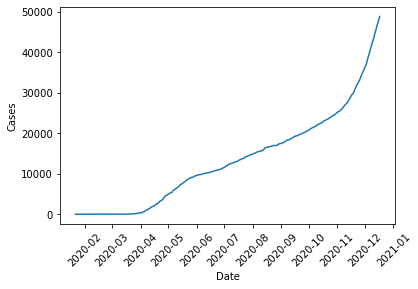

In [40]:
plt.plot(de_cases['date'], de_cases['case_count'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation = 45)

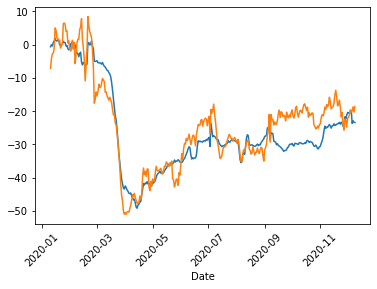

In [41]:
plt.plot(de_bus['date'], de_bus['merchants_all']* 100)
plt.plot(de_bus_rev['date'], de_bus_rev['revenue_all'] * 100)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

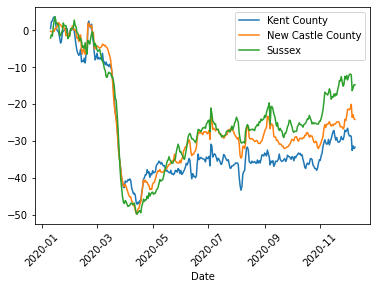

In [42]:
K, = plt.plot(bus_K_de['date'], bus_K_de['merchants_all']*100, label='Kent County')
NC, = plt.plot(bus_K_de['date'], bus_NC_de['merchants_all']*100, label='New Castle County')
S, = plt.plot(bus_K_de['date'], bus_S_de['merchants_all']*100, label='Sussex')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend([K, NC, S], ['Kent County', 'New Castle County', 'Sussex'])
plt.show()

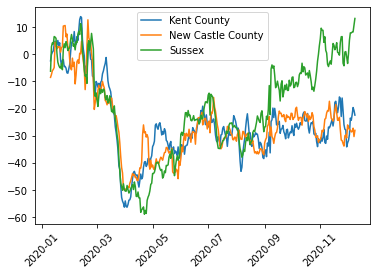

In [43]:
K_rev, = plt.plot(bus_K_rev['date'], bus_K_rev['revenue_all']*100)
NC_rev, = plt.plot(bus_K_rev['date'], bus_NC_rev['revenue_all']*100)
S_rev, = plt.plot(bus_K_rev['date'], bus_S_rev['revenue_all']*100)
plt.xticks(rotation=45)
plt.legend([K, NC, S], ['Kent County', 'New Castle County', 'Sussex'])
plt.show()

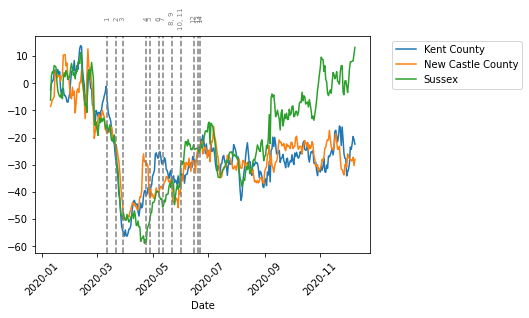

In [44]:
K_rev, = plt.plot(bus_K_rev['date'], bus_K_rev['revenue_all']*100)
NC_rev, = plt.plot(bus_NC_rev['date'], bus_NC_rev['revenue_all']*100)
S_rev, = plt.plot(bus_S_rev['date'], bus_S_rev['revenue_all']*100)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend([K, NC, S], ['Kent County', 'New Castle County', 'Sussex'], bbox_to_anchor=(1.05, 1), loc='upper left')

restrict = [
    (pd.to_datetime("2020-03-12"), '1'),
    (pd.to_datetime("2020-03-22"), '2'),
    (pd.to_datetime("2020-03-29"), '3'),
    (pd.to_datetime("2020-04-24"), '4'), 
    (pd.to_datetime("2020-04-28"), '5'),
    (pd.to_datetime("2020-05-08"), '6'),
    (pd.to_datetime("2020-05-12"), '7'),
    (pd.to_datetime("2020-05-22"), '8, 9'),
    (pd.to_datetime("2020-06-01"), '10, 11'),
    (pd.to_datetime("2020-06-15"), '12'),
    (pd.to_datetime("2020-06-20"), '13'),
    (pd.to_datetime("2020-06-22"), '14')
]

ax = plt.gca()

for date, label in restrict:
    plt.axvline(x=date, color='grey', linestyle='--')
    plt.text(date, 24, label,
             fontsize=7,
             horizontalalignment='center',
             verticalalignment='center',
             rotation=90,
             color='grey')

plt.show()

## Testing o

In [46]:
import plotly
import plotly.graph_objs as go

In [51]:
restrict_date = pd.DataFrame([
    (pd.to_datetime("2020-03-12"), '1'),
    (pd.to_datetime("2020-03-22"), '2'),
    (pd.to_datetime("2020-03-29"), '3'),
    (pd.to_datetime("2020-04-24"), '4'), 
    (pd.to_datetime("2020-04-28"), '5'),
    (pd.to_datetime("2020-05-08"), '6'),
    (pd.to_datetime("2020-05-12"), '7'),
    (pd.to_datetime("2020-05-22"), '8, 9'),
    (pd.to_datetime("2020-06-01"), '10, 11'),
    (pd.to_datetime("2020-06-15"), '12'),
    (pd.to_datetime("2020-06-20"), '13'),
    (pd.to_datetime("2020-06-22"), '14')
], columns=['date', 'event'])
print(restrict_date)

         date   event
0  2020-03-12       1
1  2020-03-22       2
2  2020-03-29       3
3  2020-04-24       4
4  2020-04-28       5
5  2020-05-08       6
6  2020-05-12       7
7  2020-05-22    8, 9
8  2020-06-01  10, 11
9  2020-06-15      12
10 2020-06-20      13
11 2020-06-22      14


In [72]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=bus_K_rev['date'], y=bus_K_rev['revenue_all']*100, name='Kent'))
fig.add_trace(go.Scatter(x=bus_NC_rev['date'], y=bus_NC_rev['revenue_all']*100, name='New Castle'))
fig.add_trace(go.Scatter(x=bus_S_rev['date'], y=bus_S_rev['revenue_all']*100, name='Sussex'))

marker = []
for index, row in restrict_date.iterrows():
    marker.append({'type': 'line',
                   'xref': 'x',
                   'yref': 'y',
                   'x0': row['date'],
                   'y0': -60,
                   'x1': row['date'],
                   'y1': 15})
    if index % 2 == 0:
        y = 20
    elif index % 2 != 0:
        y = 24
    fig.add_annotation(x=row['date'], y=y,
            text=str(row['event']),
            showarrow=False,
            textangle=-90,
            align='center')

fig.update_layout(plotly.graph_objs.Layout(shapes=marker))
                       
fig.update_layout(title='Revenue', xaxis=dict(title='Date'),
                   yaxis=dict(title='(%)'))


fig.show()